In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ids = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/36K_QC/qc_data/gcad.qc.r4.wgs.allchr.36361.GATK.2023.06.06.sample.info.ALL.ids', sep = '\t')
pheno_1kg = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/pheno_1000k.tsv', sep='\t')

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
ids_to_drop = ids.loc[ids["Replicate/Keep_Replicate_for_Analysis"] != "0" ,]["Replicate/Keep_Replicate_for_Analysis"]
len(ids_to_drop)

67

In [18]:
ibd = pd.read_excel('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/36K_QC/qc_data/gcad.r4.wgs.36361.2023.06.06.pairwise_IBD.summary.xlsx',engine='openpyxl')

In [19]:
ibd

,SUBJID1,SampleID1,Sample_Set1,ReplicateAnalysisID1,SUBJID2,SampleID2,Sample_Set2,ReplicateAnalysisID2,PI_HAT,Notes (suggested duplicate to drop for ADSP focused analyses)
0,A-LOAD-LD004376,A-LOAD-LD004376-BL-NCR-04AD6509,snd10001,REP1084,A-LOAD-LD004376,A-LOAD-LD004376-UNK-UNK-UNK0036,snd10018,REP1084,0.9834,A-LOAD-LD004376-BL-NCR-04AD6509
1,A-ADC-AD008841,A-ADC-AD008841-BL-NCR-10AD24304,snd10031,REP1113,G-KGAD-KA000206,G-KGAD-KA000206-UNK-WU-8005874212,snd10019,REP1113,0.9897,A-ADC-AD008841-BL-NCR-10AD24304
2,A-ADC-AD016717,A-ADC-AD016717-BL-NCR-13AD63111,snd10032,REP334,A-ADC-AD016717,A-ADC-AD016717-BL-NCR-13AD63111uf,snd10031,REP334,0.9914,A-ADC-AD016717-BL-NCR-13AD63111uf
3,A-LOAD-LD004379,A-LOAD-LD004379-BL-NCR-08AD9443,snd10001,REP1085,A-LOAD-LD004379,A-LOAD-LD004379-UNK-UNK-UNK0037,snd10018,REP1085,0.9924,A-LOAD-LD004379-UNK-UNK-UNK0037
4,A-CUHS-CU009833,A-CUHS-CU009833-BL-COL-55252BL1,snd10001,TECH4,A-CUHS-CU009833,A-CUHS-CU009833-BL-COL-55252BL1ld,snd10033,TECH4,0.9927,A-CUHS-CU009833-BL-COL-55252BL1ld
...,...,...,...,...,...,...,...,...,...,...
1594,P-UCLA-LA000059,P-UCLA-LA000059-UNK-UPN-F03,snd10017,REP1167,P-UCSF-PSP10538,P-UCSF-PSP10538-UNK-UPN-8882,snd10016,REP1167,1.0000,Drop both
1595,P-UCLA-LA000137,P-UCLA-LA000137-UNK-UPN-E03,snd10017,REP1173,P-UPN-PSP10085,P-UPN-PSP10085-BL-UPN-112194,snd10015,REP1173,1.0000,Drop both
1596,P-UCLA-LA000207,P-UCLA-LA000207-UNK-UPN-B11,snd10017,REP1174,P-UPN-PSP10065,P-UPN-PSP10065-BL-UPN-104130,snd10015,REP1174,1.0000,Drop both
1597,P-UCLA-LA000394,P-UCLA-LA000394-UNK-UPN-1000016,snd10017,REP1177,P-UCSF-PSP10540,P-UCSF-PSP10540-UNK-UPN-10886,snd10016,REP1177,1.0000,Drop both


In [29]:
ibd_to_drop = ibd.loc[ibd["Notes (suggested duplicate to drop for ADSP focused analyses)"] == 'Drop both',][['SampleID1','SampleID2']]
ibd_to_drop

,SampleID1,SampleID2
7,A-ADC-AD010154-BL-NCR-13AD63381,ADNI_011_S_0023
17,A-CUHS-CU009833-BL-COL-55252BL1fw,A-CUHS-CU009833-BL-COL-55252BL1ld
18,A-CUHS-CU009833-BL-COL-55252BL1ld,A-CUHS-CU009833-BL-COL-55252BL1r
19,A-CUHS-CU009833-BL-COL-55252BL1ld,A-CUHS-CU009833-BL-COL-55252BL1u3-H09
20,A-CUHS-CU009833-BL-COL-55252BL1a,A-CUHS-CU009833-BL-COL-55252BL1ld
...,...,...
1593,P-UCLA-LA000037-UNK-UPN-D04,P-UCSF-PSP10541-UNK-UPN-11037
1594,P-UCLA-LA000059-UNK-UPN-F03,P-UCSF-PSP10538-UNK-UPN-8882
1595,P-UCLA-LA000137-UNK-UPN-E03,P-UPN-PSP10085-BL-UPN-112194
1596,P-UCLA-LA000207-UNK-UPN-B11,P-UPN-PSP10065-BL-UPN-104130


In [32]:
ibd_to_drop_sampleid = ibd_to_drop.SampleID1.append(ibd_to_drop.SampleID2) #726

7         A-ADC-AD010154-BL-NCR-13AD63381
17      A-CUHS-CU009833-BL-COL-55252BL1fw
18      A-CUHS-CU009833-BL-COL-55252BL1ld
19      A-CUHS-CU009833-BL-COL-55252BL1ld
20       A-CUHS-CU009833-BL-COL-55252BL1a
                      ...                
1593        P-UCSF-PSP10541-UNK-UPN-11037
1594         P-UCSF-PSP10538-UNK-UPN-8882
1595         P-UPN-PSP10085-BL-UPN-112194
1596         P-UPN-PSP10065-BL-UPN-104130
1597        P-UCSF-PSP10540-UNK-UPN-10886
Length: 726, dtype: object

In [34]:
ibd.loc[ibd["Notes (suggested duplicate to drop for ADSP focused analyses)"] != 'Drop both',]["Notes (suggested duplicate to drop for ADSP focused analyses)"] 

0         A-LOAD-LD004376-BL-NCR-04AD6509
1         A-ADC-AD008841-BL-NCR-10AD24304
2       A-ADC-AD016717-BL-NCR-13AD63111uf
3         A-LOAD-LD004379-UNK-UNK-UNK0037
4       A-CUHS-CU009833-BL-COL-55252BL1ld
                      ...                
1585          P-MAYO-PSP0504-BR-MAY-a0067
1586           P-MAYO-PSP0525-BR-UPN-1073
1587          P-MAYO-PSP0619-BR-MAY-a0086
1588          P-MAYO-PSP0620-BR-MAY-a0087
1598        P-UPN-PSP10695-UNK-UPN-108077
Name: Notes (suggested duplicate to drop for ADSP focused analyses), Length: 1236, dtype: object

In [41]:
ibd_to_drop_sampleid = ibd_to_drop_sampleid.append(ibd.loc[ibd["Notes (suggested duplicate to drop for ADSP focused analyses)"] != 'Drop both',]["Notes (suggested duplicate to drop for ADSP focused analyses)"] )
print(len(ibd_to_drop_sampleid))

1962


## check KING result

In [46]:
king = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/king_individuals_toberemoved.txt', sep = '\t', header=None, names= ["SampleID1","SampleID2"]) 
## wait they are actually the same column, 

In [48]:
king[king.SampleID1 != king.SampleID2]

,SampleID1,SampleID2


In [51]:
king = king.SampleID1 ## 2789

In [52]:
ibd_to_drop_sampleid[~ibd_to_drop_sampleid.isin(king)] ##669 are not in king

7         A-ADC-AD010154-BL-NCR-13AD63381
22      A-CUHS-CU009833-BL-COL-55252BL1fr
44         P-NMN-PSP10423-UNK-UPN-PSPMu47
48            P-UCLA-LA000265-UNK-UPN-H11
62          P-AUS-PSP10157-UNK-UPN-V15014
                      ...                
1578           P-LTV-PSP0610-BR-MAY-a0005
1580          P-MAYO-PSP0369-BR-MAY-a0036
1585          P-MAYO-PSP0504-BR-MAY-a0067
1587          P-MAYO-PSP0619-BR-MAY-a0086
1588          P-MAYO-PSP0620-BR-MAY-a0087
Length: 669, dtype: object

In [53]:
669/1962

0.3409785932721712

# check the count if we remove sample w. IBD's suggestion

In [54]:
pheno_sampleID = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/pheno_sampleID.tsv',sep = '\t')

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4,5,6,15,16,17,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
print(pheno_sampleID[pheno_sampleID.SampleID.isin(ibd_to_drop_sampleid)].shape)
print(pheno_sampleID[pheno_sampleID.SampleID.isin(king)].shape)

(511, 52)
(2250, 52)


In [60]:
print(pheno_sampleID[pheno_sampleID.SampleID.isin(ids_to_drop)].shape)

(0, 52)


In [86]:
pheno_sampleID.shape

(33601, 52)

In [62]:
511/1962

0.2604485219164118

In [63]:
2250/2789

0.8067407673001076

In [65]:
pheno_ibd = pheno_sampleID[~pheno_sampleID.SampleID.isin(ibd_to_drop_sampleid)]
pheno_king = pheno_sampleID[~pheno_sampleID.SampleID.isin(king)]

print(pheno_ibd.shape)
print(pheno_king.shape)

(33090, 52)
(31351, 52)


In [66]:
pheno_sampleID

,SUBJID,Sex,PrevAD,IncAD,Age_current,Age_MCI_onset,Age_AD_onset,Age_baseline,APOE_reported,Race,...,Update_Latest,SampleID,BODY_SITE,ANALYTE_TYPE,Sequencing_Center,Sequencing_Platform,SAMPLE_USE,Technical_Replicate,Study_DSS,Sample_Set
0,ADNI_002_S_0413,1.0,0.0,0.0,87,NaN,NaN,76.0,33.0,5.0,...,NaN,ADNI_002_S_0413,Blood,DNA,Illumina,Illumina_HiSeq_2000,WGS,0,sa000002,snd10002
1,ADNI_002_S_0685,1.0,0.0,0.0,90+,NaN,NaN,89.0,33.0,5.0,...,NaN,ADNI_002_S_0685,Blood,DNA,Illumina,Illumina_HiSeq_2000,WGS,0,sa000002,snd10002
2,ADNI_002_S_0729,1.0,0.0,1.0,72,NaN,68,65.0,34.0,5.0,...,NaN,ADNI_002_S_0729,Blood,DNA,Illumina,Illumina_HiSeq_2000,WGS,0,sa000002,snd10002
3,ADNI_002_S_1155,0.0,0.0,0.0,69,52,NaN,57.0,33.0,5.0,...,NaN,ADNI_002_S_1155,Blood,DNA,Illumina,Illumina_HiSeq_2000,WGS,0,sa000002,snd10002
4,ADNI_002_S_1261,1.0,0.0,0.0,82,81,NaN,71.0,33.0,5.0,...,NaN,ADNI_002_S_1261,Blood,DNA,Illumina,Illumina_HiSeq_2000,WGS,0,sa000002,snd10002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33596,G-MSBB-MB000337,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,4.0,...,0.0,G-MSBB-MB000337-BR-MSBB-76349,Brain,DNA,NYGC,Illumina_HiSeqX,WGS,0,sa000011,snd10011
33597,G-MSBB-MB000338,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,...,0.0,G-MSBB-MB000338-BR-MSBB-76350,Brain,DNA,NYGC,Illumina_HiSeqX,WGS,0,sa000011,snd10011
33598,G-MSBB-MB000339,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,...,0.0,G-MSBB-MB000339-BR-MSBB-76351,Brain,DNA,NYGC,Illumina_HiSeqX,WGS,0,sa000011,snd10011
33599,G-MSBB-MB000340,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,...,0.0,G-MSBB-MB000340-BR-MSBB-76352,Brain,DNA,NYGC,Illumina_HiSeqX,WGS,0,sa000011,snd10011


In [67]:
pheno_no_null = pheno_sampleID[pheno_sampleID.Diagnosis.notnull()]
print(pheno_no_null.shape)
pheno_no_null = pheno_no_null.dropna(subset=['Age']) 
print(pheno_no_null.shape)

(28947, 52)
(28232, 52)


In [69]:
print(pheno_no_null[pheno_no_null.SampleID.isin(ibd_to_drop_sampleid)].shape)
print(pheno_no_null[pheno_no_null.SampleID.isin(king)].shape)

pheno_ibd = pheno_no_null[~pheno_no_null.SampleID.isin(ibd_to_drop_sampleid)]
pheno_king = pheno_no_null[~pheno_no_null.SampleID.isin(king)]

print(pheno_ibd.shape)
print(pheno_king.shape)

(404, 52)
(1880, 52)
(27828, 52)
(26352, 52)


In [71]:
pheno_1kg.shape

(26334, 37)

In [76]:
ibd_suggested = pheno_1kg[pheno_1kg.SampleID.isin(ibd_to_drop_sampleid[~ibd_to_drop_sampleid.isin(king)])]

In [83]:
ibd_suggested.shape

(435, 37)

In [84]:
ibd_suggested.source.value_counts()

case_control    431
Family_based      3
ADNI              1
Name: source, dtype: int64

<AxesSubplot:title={'center':'IBD suggested to remove'}>

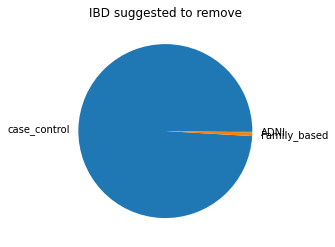

In [81]:
ibd_suggested.source.value_counts().plot(kind='pie', ylabel='', title='IBD suggested to remove')

<AxesSubplot:title={'center':'IBD suggested to remove'}>

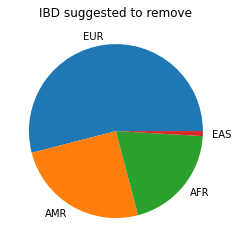

In [82]:
ibd_suggested.predicted_ancestry.value_counts().plot(kind='pie', ylabel='', title='IBD suggested to remove')

In [98]:
pheno_1kg_IBD = pheno_1kg[~pheno_1kg.SampleID.isin(ibd_suggested.SampleID)] #25899
pheno_1kg_IBD

,SUBJID,SampleID,Sex,Diagnosis,APOE_reported,Age,Race,Ethnicity,FamID,source,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,ADNI_002_S_0685,ADNI_002_S_0685,1.0,0.0,33.0,90,5.0,0.0,NaN,ADNI,...,-0.1291,0.1888,1.2494,-1.9800,0.4404,-1.6879,0.3571,1.1045,-2.2589,-2.8125
1,ADNI_002_S_1155,ADNI_002_S_1155,0.0,0.0,33.0,69,5.0,0.0,NaN,ADNI,...,-1.9598,-0.2402,1.1720,1.3591,1.1451,-0.0500,-0.3733,1.1487,-0.0178,-2.1215
2,ADNI_002_S_1261,ADNI_002_S_1261,1.0,0.0,33.0,82,5.0,0.0,NaN,ADNI,...,0.5693,0.8296,-1.8191,0.4448,0.3960,-0.4971,0.0639,0.7521,-0.1974,-2.4702
3,ADNI_002_S_2010,ADNI_002_S_2010,1.0,0.0,34.0,68,6.0,0.0,NaN,ADNI,...,-0.4873,-0.8054,1.2155,-0.9010,1.2350,-0.5126,0.5264,2.6370,-1.3014,-2.9664
4,ADNI_002_S_2073,ADNI_002_S_2073,1.0,0.0,33.0,69,5.0,0.0,NaN,ADNI,...,2.6870,-1.1769,-0.5115,-0.0337,1.2445,-1.6332,-1.3144,1.0681,-0.9179,-2.7834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26329,A-CUHS-CU005861,A-CUHS-CU005861-BL-COL-49677BL1,1.0,0.0,33.0,58,6.0,1.0,CU0170F,Family_based,...,-0.8532,0.6294,2.9415,-0.6988,-0.9819,-0.5281,-0.2099,2.5507,-0.1355,-1.9739
26330,A-WRAP-WR000875,A-WRAP-WR000875-BL-NCR-104770975,1.0,0.0,33.0,61,5.0,0.0,WR1702F,Family_based,...,-0.7980,-0.1495,0.4935,1.0514,-1.1946,-0.4326,0.3378,1.5908,-0.4217,-2.4601
26331,A-CUHS-CU004425,A-CUHS-CU004425-BL-COL-40853BL1,0.0,0.0,33.0,63,6.0,1.0,CU0149F,Family_based,...,-0.6031,-0.9181,1.4087,1.1161,-0.6302,-0.8908,0.4940,1.4535,-1.2119,-2.9259
26332,A-WRAP-WR000196,A-WRAP-WR000196-BL-NCR-0005966657,1.0,0.0,34.0,64,5.0,0.0,WR1163F,Family_based,...,0.3034,0.7651,0.9229,1.6726,0.0112,1.0862,-1.1376,-0.6324,-0.1302,-1.8220


In [99]:
pheno_1kg_IBD.to_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/pheno_KING_IBD.tsv', sep = '\t', index = False)

## Replace king with IBD

In [87]:
family = pheno_ibd[pheno_ibd.source=='Family_based']  

# Randomly shuffle the rows of the DataFrame
families = family.sample(frac=1)

# Sort the DataFrame by 'Diagnosis' column, group by 'FamID', select the first row in each group, and reset the index
one_per_fam = families.sort_values(by='Diagnosis', ascending=False)\
                     .groupby('FamID', sort=False)\
                     .head(1)\
                     .reset_index(drop=True)
pheno_ibd_fin = pd.concat([pheno_ibd[pheno_ibd.source!='Family_based'],one_per_fam])

In [88]:
pheno_ibd_fin.shape

(27071, 52)

In [91]:
pheno_ibd_fin= pheno_ibd_fin[['SUBJID','SampleID', 'Sex', 'Diagnosis', 'APOE_reported', 'Age', 'Race',
       'Ethnicity', 'FamID', 'source']]

In [92]:
pc = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/36K_preview/somalier_sites/ADSP_ancestry.somalier-ancestry.tsv', sep = '\t')
pheno_ibd_pc = pheno_ibd_fin.merge(pc, left_on="SampleID", right_on="#sample_id")

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [93]:
pheno_ibd_pc

,SUBJID,SampleID,Sex,Diagnosis,APOE_reported,Age,Race,Ethnicity,FamID,source,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,ADNI_002_S_0685,ADNI_002_S_0685,1.0,0.0,33.0,90.0,5.0,0.0,NaN,ADNI,...,-0.1291,0.1888,1.2494,-1.9800,0.4404,-1.6879,0.3571,1.1045,-2.2589,-2.8125
1,ADNI_002_S_1155,ADNI_002_S_1155,0.0,0.0,33.0,69.0,5.0,0.0,NaN,ADNI,...,-1.9598,-0.2402,1.1720,1.3591,1.1451,-0.0500,-0.3733,1.1487,-0.0178,-2.1215
2,ADNI_002_S_1261,ADNI_002_S_1261,1.0,0.0,33.0,82.0,5.0,0.0,NaN,ADNI,...,0.5693,0.8296,-1.8191,0.4448,0.3960,-0.4971,0.0639,0.7521,-0.1974,-2.4702
3,ADNI_002_S_2010,ADNI_002_S_2010,1.0,0.0,34.0,68.0,6.0,0.0,NaN,ADNI,...,-0.4873,-0.8054,1.2155,-0.9010,1.2350,-0.5126,0.5264,2.6370,-1.3014,-2.9664
4,ADNI_002_S_2043,ADNI_002_S_2043,1.0,0.0,34.0,73.0,5.0,0.0,NaN,ADNI,...,-1.2183,0.5972,0.6544,-0.1074,1.2218,-0.5946,1.3398,0.5496,-1.2872,-4.5351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27066,A-CUHS-CU009824,A-CUHS-CU009824-BL-COL-41567BL1,1.0,0.0,33.0,62.0,6.0,1.0,CU0408F,Family_based,...,0.9963,-0.0937,1.7216,0.4859,-0.7507,0.2706,-1.3342,-0.6434,-0.8623,-2.5705
27067,A-CUHS-CU005861,A-CUHS-CU005861-BL-COL-49677BL1,1.0,0.0,33.0,58.0,6.0,1.0,CU0170F,Family_based,...,-0.8532,0.6294,2.9415,-0.6988,-0.9819,-0.5281,-0.2099,2.5507,-0.1355,-1.9739
27068,A-CUHS-CU009816,A-CUHS-CU009816-BL-COL-41553BL1,1.0,0.0,34.0,76.0,5.0,1.0,CU0400F,Family_based,...,1.0146,-1.6771,1.5183,-0.0754,-0.1619,-0.4543,-0.7667,0.9952,0.2616,-2.2645
27069,A-CUHS-CU011550,A-CUHS-CU011550-BL-COL-56372BL1,1.0,0.0,44.0,66.0,6.0,1.0,CU1711F,Family_based,...,-0.8322,-1.3196,-0.5324,0.6456,-0.6681,-0.8344,0.5677,-0.8421,-0.8672,-4.6620


In [94]:
pheno_ibd_pc.to_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/pheno_ADSP_IBD.tsv', sep = '\t', index = False)

In [100]:
pheno_1kg.shape

(26334, 37)

## add sequencing center and platform

In [4]:
pheno_ibd_pc=pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/pheno_ADSP_IBD.tsv', sep = '\t')
info=pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/pheno_sampleID.tsv', sep='\t')

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4,5,6,15,16,17,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
pheno_ibd_pc

,SUBJID,SampleID,Sex,Diagnosis,APOE_reported,Age,Race,Ethnicity,FamID,source,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,ADNI_002_S_0685,ADNI_002_S_0685,1.0,0.0,33.0,90.0,5.0,0.0,NaN,ADNI,...,-0.1291,0.1888,1.2494,-1.9800,0.4404,-1.6879,0.3571,1.1045,-2.2589,-2.8125
1,ADNI_002_S_1155,ADNI_002_S_1155,0.0,0.0,33.0,69.0,5.0,0.0,NaN,ADNI,...,-1.9598,-0.2402,1.1720,1.3591,1.1451,-0.0500,-0.3733,1.1487,-0.0178,-2.1215
2,ADNI_002_S_1261,ADNI_002_S_1261,1.0,0.0,33.0,82.0,5.0,0.0,NaN,ADNI,...,0.5693,0.8296,-1.8191,0.4448,0.3960,-0.4971,0.0639,0.7521,-0.1974,-2.4702
3,ADNI_002_S_2010,ADNI_002_S_2010,1.0,0.0,34.0,68.0,6.0,0.0,NaN,ADNI,...,-0.4873,-0.8054,1.2155,-0.9010,1.2350,-0.5126,0.5264,2.6370,-1.3014,-2.9664
4,ADNI_002_S_2043,ADNI_002_S_2043,1.0,0.0,34.0,73.0,5.0,0.0,NaN,ADNI,...,-1.2183,0.5972,0.6544,-0.1074,1.2218,-0.5946,1.3398,0.5496,-1.2872,-4.5351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27066,A-CUHS-CU009824,A-CUHS-CU009824-BL-COL-41567BL1,1.0,0.0,33.0,62.0,6.0,1.0,CU0408F,Family_based,...,0.9963,-0.0937,1.7216,0.4859,-0.7507,0.2706,-1.3342,-0.6434,-0.8623,-2.5705
27067,A-CUHS-CU005861,A-CUHS-CU005861-BL-COL-49677BL1,1.0,0.0,33.0,58.0,6.0,1.0,CU0170F,Family_based,...,-0.8532,0.6294,2.9415,-0.6988,-0.9819,-0.5281,-0.2099,2.5507,-0.1355,-1.9739
27068,A-CUHS-CU009816,A-CUHS-CU009816-BL-COL-41553BL1,1.0,0.0,34.0,76.0,5.0,1.0,CU0400F,Family_based,...,1.0146,-1.6771,1.5183,-0.0754,-0.1619,-0.4543,-0.7667,0.9952,0.2616,-2.2645
27069,A-CUHS-CU011550,A-CUHS-CU011550-BL-COL-56372BL1,1.0,0.0,44.0,66.0,6.0,1.0,CU1711F,Family_based,...,-0.8322,-1.3196,-0.5324,0.6456,-0.6681,-0.8344,0.5677,-0.8421,-0.8672,-4.6620


In [8]:
info.columns

Index(['SUBJID', 'Sex', 'PrevAD', 'IncAD', 'Age_current', 'Age_MCI_onset',
       'Age_AD_onset', 'Age_baseline', 'APOE_reported', 'Race',
       'AD_last_visit', 'Ethnicity', 'Diagnosis', 'Age', 'source', 'FamID',
       'Father', 'Mother', 'AD', 'APOE_WGS', 'AUTOPSY', 'Braak', 'FamGrp',
       'Comments', 'Duplicate_SUBJID', 'Latest_Update_Version', 'Base_AD',
       'Base_Age', 'Base_AUTOPSY', 'Base_Braak', 'Base_Version',
       'Update_baseline', 'Update_latest', 'Update_ADstatus', 'Correction',
       'Selection', 'Comments.1', 'AD_prev', 'Comments_prev', 'Base_PrevAD',
       'Base_IncAD', 'Update_Baseline', 'Update_Latest', 'SampleID',
       'BODY_SITE', 'ANALYTE_TYPE', 'Sequencing_Center', 'Sequencing_Platform',
       'SAMPLE_USE', 'Technical_Replicate', 'Study_DSS', 'Sample_Set'],
      dtype='object')

In [11]:
sequencing_center = info[['SUBJID','Sequencing_Center', 'Sequencing_Platform']]

In [12]:
pheno_ibd_new = pheno_ibd_pc.merge(sequencing_center)

,SUBJID,SampleID,Sex,Diagnosis,APOE_reported,Age,Race,Ethnicity,FamID,source,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,Sequencing_Center,Sequencing_Platform
0,ADNI_002_S_0685,ADNI_002_S_0685,1.0,0.0,33.0,90.0,5.0,0.0,NaN,ADNI,...,1.2494,-1.9800,0.4404,-1.6879,0.3571,1.1045,-2.2589,-2.8125,Illumina,Illumina_HiSeq_2000
1,ADNI_002_S_1155,ADNI_002_S_1155,0.0,0.0,33.0,69.0,5.0,0.0,NaN,ADNI,...,1.1720,1.3591,1.1451,-0.0500,-0.3733,1.1487,-0.0178,-2.1215,Illumina,Illumina_HiSeq_2000
2,ADNI_002_S_1261,ADNI_002_S_1261,1.0,0.0,33.0,82.0,5.0,0.0,NaN,ADNI,...,-1.8191,0.4448,0.3960,-0.4971,0.0639,0.7521,-0.1974,-2.4702,Illumina,Illumina_HiSeq_2000
3,ADNI_002_S_2010,ADNI_002_S_2010,1.0,0.0,34.0,68.0,6.0,0.0,NaN,ADNI,...,1.2155,-0.9010,1.2350,-0.5126,0.5264,2.6370,-1.3014,-2.9664,Illumina,Illumina_HiSeq_2000
4,ADNI_002_S_2043,ADNI_002_S_2043,1.0,0.0,34.0,73.0,5.0,0.0,NaN,ADNI,...,0.6544,-0.1074,1.2218,-0.5946,1.3398,0.5496,-1.2872,-4.5351,Illumina,Illumina_HiSeq_2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27066,A-CUHS-CU009824,A-CUHS-CU009824-BL-COL-41567BL1,1.0,0.0,33.0,62.0,6.0,1.0,CU0408F,Family_based,...,1.7216,0.4859,-0.7507,0.2706,-1.3342,-0.6434,-0.8623,-2.5705,WashU,Illumina_HiSeqX
27067,A-CUHS-CU005861,A-CUHS-CU005861-BL-COL-49677BL1,1.0,0.0,33.0,58.0,6.0,1.0,CU0170F,Family_based,...,2.9415,-0.6988,-0.9819,-0.5281,-0.2099,2.5507,-0.1355,-1.9739,WashU,Illumina_HiSeqX
27068,A-CUHS-CU009816,A-CUHS-CU009816-BL-COL-41553BL1,1.0,0.0,34.0,76.0,5.0,1.0,CU0400F,Family_based,...,1.5183,-0.0754,-0.1619,-0.4543,-0.7667,0.9952,0.2616,-2.2645,WashU,Illumina_HiSeqX
27069,A-CUHS-CU011550,A-CUHS-CU011550-BL-COL-56372BL1,1.0,0.0,44.0,66.0,6.0,1.0,CU1711F,Family_based,...,-0.5324,0.6456,-0.6681,-0.8344,0.5677,-0.8421,-0.8672,-4.6620,USUHS,Illumina_NovaSeq


In [13]:
pheno_ibd_new = pheno_ibd_pc.merge(sequencing_center)
pheno_ibd_new.to_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/pheno_ADSP_IBD.tsv', sep = '\t', index = False)

In [2]:

pheno_ibd_new = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/pheno_ADSP_IBD.tsv', sep = '\t')

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pheno_ibd_new

,SUBJID,SampleID,Sex,Diagnosis,APOE_reported,Age,Race,Ethnicity,FamID,source,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,Sequencing_Center,Sequencing_Platform
0,ADNI_002_S_0685,ADNI_002_S_0685,1.0,0.0,33.0,90.0,5.0,0.0,NaN,ADNI,...,1.2494,-1.9800,0.4404,-1.6879,0.3571,1.1045,-2.2589,-2.8125,Illumina,Illumina_HiSeq_2000
1,ADNI_002_S_1155,ADNI_002_S_1155,0.0,0.0,33.0,69.0,5.0,0.0,NaN,ADNI,...,1.1720,1.3591,1.1451,-0.0500,-0.3733,1.1487,-0.0178,-2.1215,Illumina,Illumina_HiSeq_2000
2,ADNI_002_S_1261,ADNI_002_S_1261,1.0,0.0,33.0,82.0,5.0,0.0,NaN,ADNI,...,-1.8191,0.4448,0.3960,-0.4971,0.0639,0.7521,-0.1974,-2.4702,Illumina,Illumina_HiSeq_2000
3,ADNI_002_S_2010,ADNI_002_S_2010,1.0,0.0,34.0,68.0,6.0,0.0,NaN,ADNI,...,1.2155,-0.9010,1.2350,-0.5126,0.5264,2.6370,-1.3014,-2.9664,Illumina,Illumina_HiSeq_2000
4,ADNI_002_S_2043,ADNI_002_S_2043,1.0,0.0,34.0,73.0,5.0,0.0,NaN,ADNI,...,0.6544,-0.1074,1.2218,-0.5946,1.3398,0.5496,-1.2872,-4.5351,Illumina,Illumina_HiSeq_2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27066,A-CUHS-CU009824,A-CUHS-CU009824-BL-COL-41567BL1,1.0,0.0,33.0,62.0,6.0,1.0,CU0408F,Family_based,...,1.7216,0.4859,-0.7507,0.2706,-1.3342,-0.6434,-0.8623,-2.5705,WashU,Illumina_HiSeqX
27067,A-CUHS-CU005861,A-CUHS-CU005861-BL-COL-49677BL1,1.0,0.0,33.0,58.0,6.0,1.0,CU0170F,Family_based,...,2.9415,-0.6988,-0.9819,-0.5281,-0.2099,2.5507,-0.1355,-1.9739,WashU,Illumina_HiSeqX
27068,A-CUHS-CU009816,A-CUHS-CU009816-BL-COL-41553BL1,1.0,0.0,34.0,76.0,5.0,1.0,CU0400F,Family_based,...,1.5183,-0.0754,-0.1619,-0.4543,-0.7667,0.9952,0.2616,-2.2645,WashU,Illumina_HiSeqX
27069,A-CUHS-CU011550,A-CUHS-CU011550-BL-COL-56372BL1,1.0,0.0,44.0,66.0,6.0,1.0,CU1711F,Family_based,...,-0.5324,0.6456,-0.6681,-0.8344,0.5677,-0.8421,-0.8672,-4.6620,USUHS,Illumina_NovaSeq


In [4]:
pheno_ibd_new.Sex.value_counts()

1.0    16770
0.0    10301
Name: Sex, dtype: int64

In [8]:
pheno_ibd_new.groupby([ 'predicted_ancestry','Sex']).size().reset_index(name='count')

,predicted_ancestry,Sex,count
0,AFR,0.0,1666
1,AFR,1.0,4205
2,AMR,0.0,2384
3,AMR,1.0,4484
4,EAS,0.0,48
5,EAS,1.0,50
6,EUR,0.0,4931
7,EUR,1.0,6616
8,SAS,0.0,1272
9,SAS,1.0,1415


In [9]:
pd.pivot_table(pheno_ibd_new, index=['predicted_ancestry'], columns=['Sex'], aggfunc='size', fill_value=0)

Sex,0.0,1.0
predicted_ancestry,,
AFR,1666,4205
AMR,2384,4484
EAS,48,50
EUR,4931,6616
SAS,1272,1415
